In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

## Data preparation

In [45]:
# Read the file 
file_path= "online_retail_II.xlsx"

# Load both sheets into DataFrames
df1= pd.read_excel(file_path, sheet_name=0)  # Year 2009 - 2010
df2= pd.read_excel(file_path, sheet_name=1)  # Year 2010 - 2011

# Combine the filtered data from the first sheet with the entire second sheet
df= pd.concat([df1, df2], ignore_index=True)
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [46]:
df.describe

<bound method NDFrame.describe of         Invoice StockCode                          Description  Quantity  \
0        489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1        489434    79323P                   PINK CHERRY LIGHTS        12   
2        489434    79323W                  WHITE CHERRY LIGHTS        12   
3        489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4        489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...         ...       ...                                  ...       ...   
1067366  581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
1067367  581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
1067368  581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
1067369  581587     22138        BAKING SET 9 PIECE RETROSPOT          3   
1067370  581587      POST                              POSTAGE         1   

                InvoiceDate  Price  Customer ID      

In [47]:
df.dtypes

Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
dtype: object

In [48]:
df.isna().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

In [49]:
# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Create TotalPrice
df['TotalPrice'] = df['Quantity'] * df['Price']

# Check for missing values
df.dropna(subset=['Customer ID'], inplace=True)

# Adding year, month, day
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day

print(df)

        Invoice StockCode                          Description  Quantity  \
0        489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1        489434    79323P                   PINK CHERRY LIGHTS        12   
2        489434    79323W                  WHITE CHERRY LIGHTS        12   
3        489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4        489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...         ...       ...                                  ...       ...   
1067366  581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
1067367  581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
1067368  581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
1067369  581587     22138        BAKING SET 9 PIECE RETROSPOT          3   
1067370  581587      POST                              POSTAGE         1   

                InvoiceDate  Price  Customer ID         Country  TotalPrice  \
0       

## EDA

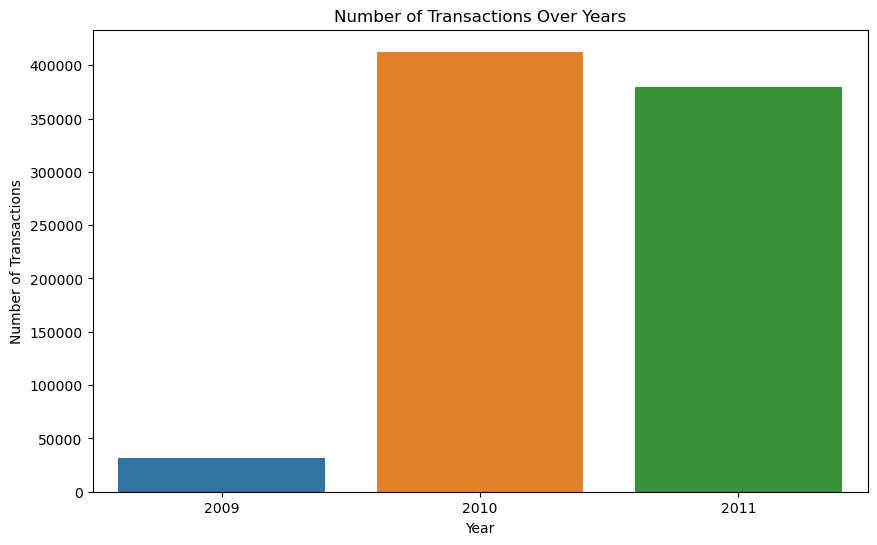

In [50]:
# Visualize purchase patterns
plt.figure(figsize=(10, 6))
sns.countplot(x='Year', data=df)
plt.title('Number of Transactions Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Transactions')
plt.show()


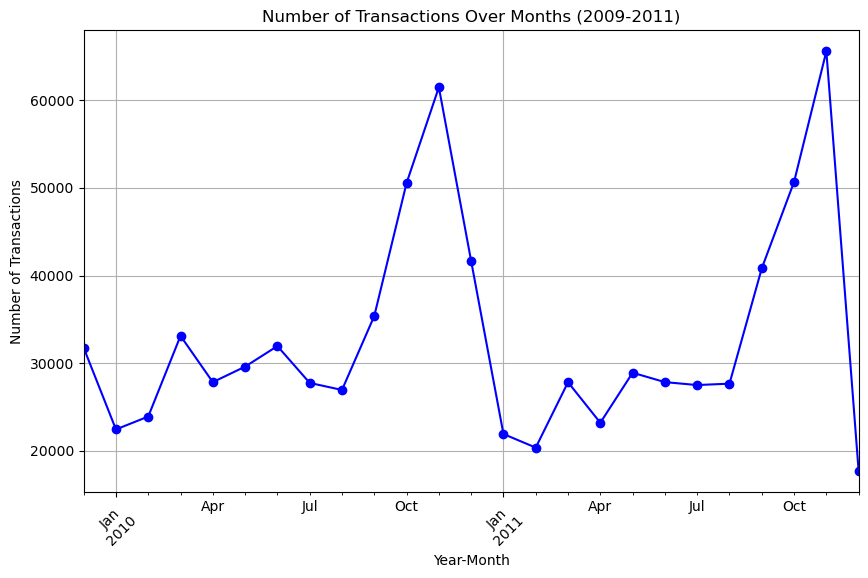

In [53]:
# convert year to month
df['Year_Month'] = df['InvoiceDate'].dt.to_period('M')

# transactions in every months
monthly_transactions = df.groupby('Year_Month').size()

# Plot the figure
plt.figure(figsize=(10, 6))
monthly_transactions.plot(kind='line', marker='o', color='b')
plt.title('Number of Transactions Over Months (2009-2011)')
plt.xlabel('Year-Month')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

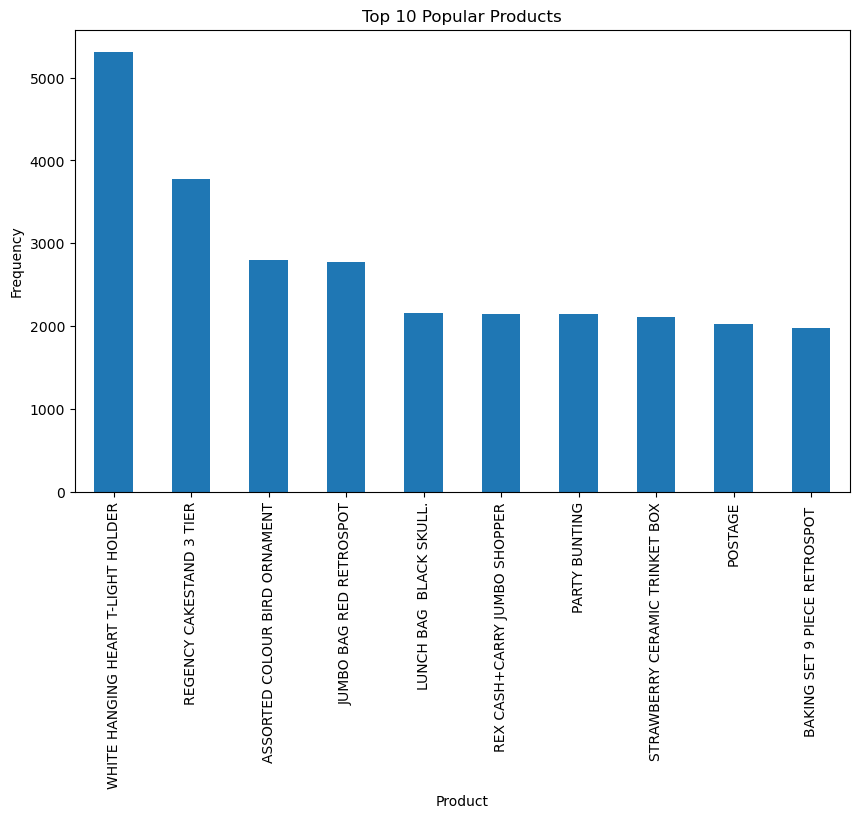

In [54]:
# Visualize popular products
plt.figure(figsize=(10, 6))
popular_products = df['Description'].value_counts().nlargest(10)
popular_products.plot(kind='bar')
plt.title('Top 10 Popular Products')
plt.xlabel('Product')
plt.ylabel('Frequency')
plt.show()

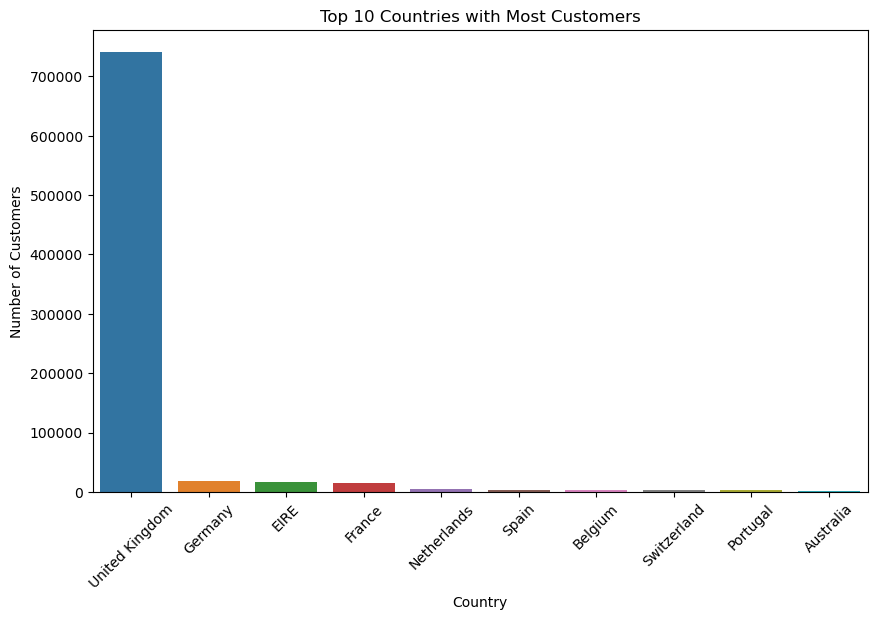

In [55]:
# Visualize customer demographics
plt.figure(figsize=(10, 6))
sns.countplot(x='Country', data=df, order=df['Country'].value_counts().index[:10])
plt.title('Top 10 Countries with Most Customers')
plt.xlabel('Country')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

In [60]:
# 1 month
one_months_ago = df['InvoiceDate'].max() - pd.DateOffset(months=1)
churned_customers = df[df['InvoiceDate'] <= one_months_ago]['Customer ID'].nunique()
total_customers = df['Customer ID'].nunique()

# calculate churn rate
churn_rate = churned_customers / total_customers

print("Customer Churn Rate in the last 1 months:", churn_rate)


# 12 months
tw_months_ago = df['InvoiceDate'].max() - pd.DateOffset(months=12)
churned_customers1 = df[df['InvoiceDate'] <= tw_months_ago]['Customer ID'].nunique()
total_customers = df['Customer ID'].nunique()

# calculate churn rate
churn_rate = churned_customers1 / total_customers

print("Customer Churn Rate in the last 12 months:", churn_rate)

# frequency of purchases
frequency = df.groupby('Customer ID').size().mean()
print("Average Frequency of Purchases:", frequency)

# Average order value 
average_order_value = df['TotalPrice'].mean()
print("Average Order Value:", average_order_value)

Customer Churn Rate in the last 1 months: 0.9727364523729384
Customer Churn Rate in the last 12 months: 0.7374621339616291
Average Frequency of Purchases: 138.73510602490745
Average Order Value: 20.195317102639127


In [61]:
# Check customer ID 
duplicate_count = df['Customer ID'].value_counts()
print(duplicate_count)

Customer ID
17841.0    13097
14911.0    11613
12748.0     7307
14606.0     6709
14096.0     5128
           ...  
14580.0        1
16154.0        1
16443.0        1
15233.0        1
17948.0        1
Name: count, Length: 5942, dtype: int64


In [77]:
# Check quantity
negative_quantity = df[df['Quantity'] < 0]['Quantity']
num_negative_quantity = negative_quantity.count()
print("Number of negative quantities:", num_negative_quantity)


Number of negative quantities: 790


## Model development

In [62]:
# Check the number of Churned customers and retained customers in different timeframe (3 and 6)
# Calculate the date three months ago
three_months_ago = df['InvoiceDate'].max() - pd.DateOffset(months=3)

# Identify churned customers
churned_customers = df[df['InvoiceDate'] <= three_months_ago]['Customer ID'].unique()

# Create a new column 'Churn' to encode churned customers as 1 and retained customers as 0
df['Churn'] = df['Customer ID'].isin(churned_customers).astype(int)

# Drop duplicates
df.drop_duplicates(subset=['Customer ID'], keep='last', inplace=True)

# Display the churned and retained customers
print("Churned customers:", df[df['Churn'] == 1]['Customer ID'].nunique())
print("Retained customers:", df[df['Churn'] == 0]['Customer ID'].nunique())


Churned customers: 5344
Retained customers: 598


In [63]:
# Model Development
# Define X and y
X = df[['Quantity', 'Price', 'Year', 'Month', 'Day']]  # Features
y = df['Churn']  # Target variable

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [65]:
# Define deep learning model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(X_train_scaled, y_train, epochs=20, batch_size=64, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model
y_pred = model.predict(X_test_scaled)
y_pred_classes = np.round(y_pred)
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)
roc_auc = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

Epoch 1/20


c:\Users\USER\anacondanew\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7797 - loss: 0.5325 - val_accuracy: 0.8948 - val_loss: 0.3090
Epoch 2/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9062 - loss: 0.3085 - val_accuracy: 0.8948 - val_loss: 0.2811
Epoch 3/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8921 - loss: 0.3126 - val_accuracy: 0.8948 - val_loss: 0.2742
Epoch 4/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9070 - loss: 0.2628 - val_accuracy: 0.8948 - val_loss: 0.2705
Epoch 5/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9071 - loss: 0.2657 - val_accuracy: 0.8948 - val_loss: 0.2679
Epoch 6/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8983 - loss: 0.2807 - val_accuracy: 0.8948 - val_loss: 0.2668
Epoch 7/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8937 - loss: 0.2813 - val_accuracy: 0.8948 - val_loss: 0.2650
Epoch 8/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9005 - loss: 0.2648 - val_accuracy: 0.8948 - val_loss: 0.2635
Epo

## Improve model

In [66]:
# Calculate the date six months ago
six_months_ago = df['InvoiceDate'].max() - pd.DateOffset(months=6)

# Identify churned customers
churned_customers = df[df['InvoiceDate'] <= six_months_ago]['Customer ID'].unique()
df['Churn'] = df['Customer ID'].isin(churned_customers).astype(int)
df.drop_duplicates(subset=['Customer ID'], keep='last', inplace=True)

# Display the churned and retained customers
print("Churned customers:", df[df['Churn'] == 1]['Customer ID'].nunique())
print("Retained customers:", df[df['Churn'] == 0]['Customer ID'].nunique())

Churned customers: 2423
Retained customers: 3519


In [75]:
# Define X and y
X1 = df[['Quantity', 'Price', 'Year', 'Month', 'Day']]  # Features
y1 = df['Churn']  # Target variable

# Split the data into train and test sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [68]:
# Define the deep learning model
model1 = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
history = model1.fit(X_train_scaled, y1_train, epochs=20, batch_size=64, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model
y1_pred = model1.predict(X_test_scaled)
y1_pred_classes = np.round(y1_pred)
accuracy = accuracy_score(y1_test, y1_pred_classes)
precision = precision_score(y1_test, y1_pred_classes)
recall = recall_score(y1_test, y1_pred_classes)
f1 = f1_score(y1_test, y1_pred_classes)
roc_auc = roc_auc_score(y1_test, y1_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

Epoch 1/20


c:\Users\USER\anacondanew\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6649 - loss: 0.6125 - val_accuracy: 0.9821 - val_loss: 0.2763
Epoch 2/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9485 - loss: 0.2608 - val_accuracy: 0.9926 - val_loss: 0.0737
Epoch 3/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9724 - loss: 0.1109 - val_accuracy: 0.9937 - val_loss: 0.0355
Epoch 4/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9767 - loss: 0.0714 - val_accuracy: 0.9926 - val_loss: 0.0247
Epoch 5/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9884 - loss: 0.0582 - val_accuracy: 0.9968 - val_loss: 0.0196
Epoch 6/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9842 - loss: 0.0582 - val_accuracy: 0.9968 - val_loss: 0.0168
Epoch 7/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9842 - loss: 0.0769 - val_accuracy: 0.9989 - val_loss: 0.0134
Epoch 8/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9899 - loss: 0.0337 - val_accuracy: 1.0000 - val_loss: 0.0114
Epo

## K-means

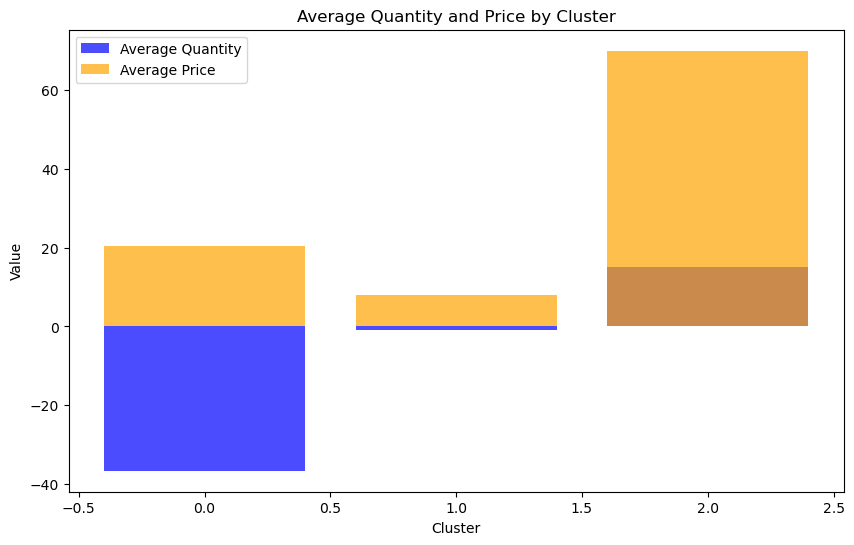

In [76]:
# Select features
X3 = df[['Quantity', 'Price', 'Year', 'Month', 'Day']]

# Standardize features
scaler = StandardScaler()
X3_scaled = scaler.fit_transform(X3)

# Choose the number of clusters
n_clusters = 3

# Create K-means clustering model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X3_scaled)

df['Cluster'] = kmeans.labels_

# Calculate the average purchase quantity and average price for each cluster
cluster_stats = df.groupby('Cluster').agg({
    'Quantity': 'mean',
    'Price': 'mean'
}).reset_index()

# Visualize the average purchase quantity and average price for each cluster
plt.figure(figsize=(10, 6))
plt.bar(cluster_stats['Cluster'], cluster_stats['Quantity'], color='blue', alpha=0.7, label='Average Quantity')
plt.bar(cluster_stats['Cluster'], cluster_stats['Price'], color='orange', alpha=0.7, label='Average Price')
plt.xlabel('Cluster')
plt.ylabel('Value')
plt.title('Average Quantity and Price by Cluster')
plt.legend()
plt.show()